# Final Project Data Science: Rekomendasi Pembelian Rumah

## Business Understanding

### Latar Belakang
Rumah adalah kebutuhan utama manusia untuk hidup. Dalam pembelian rumah, terdapat proses pemilihan rumah yang melibatkan faktor-faktor tertentu untuk menentukan apakah pilihan rumah tersebut tepat dan menguntungkan. Dalam proses pembelian tersebut, pembeli rumah biasanya akan bingung bagaimana memilih dan menilai rumah yang tepat dari banyaknya pilihan rumah yang ada karena batasnya kemampuan informasi. Oleh karena itu, diperlukannya sistem untuk merekomendasikan pembelian rumah dan membantu pembeli membuat keputusan agar bisa membeli rumah yang tepat dan menguntungkan.
### Tujuan Bisnis
Menyediakan rekomendasi rumah yang optimal bagi calon pembeli, berdasarkan atribut yang relevan, seperti harga, lokasi, fasilitas, dan preferensi lainnya.
### Tujuan Data Science
1. Mengidentifikasi atribut-atribut rumah yang berpengaruh kepada harga rumah dan visualisasi hubungan antar atribut rumah.
2. Memprediksi rumah yang tepat dan menguntungkan berdasarkan atribut yang ditentukan
### Permasalahan Bisnis
1. Tidak adanya alat bantu yang dapat memberikan rekomendasi berbasis data
### Kebutuhan
1. Data: informasi atribut rumah.
2. Analisis: pengaruh antar atribut rumah
3. Model: sistem rekomendasi untuk pembelian rumah

## Data Understanding
- Mengidentifikasi isi dan variabel data, termasuk tipe data dan statistik deskriptif.

In [1]:
import pandas as pd

df = pd.read_csv('data_porto_2.csv', index_col='date', parse_dates=True)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
2014-05-02,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
2014-05-02,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA


In [2]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4600 entries, 2014-05-02 to 2014-07-10
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)

## Data Preparation


Missing value data and duplicated data

In [4]:
print(df.isna().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [5]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []


Inconsistent data, outlier

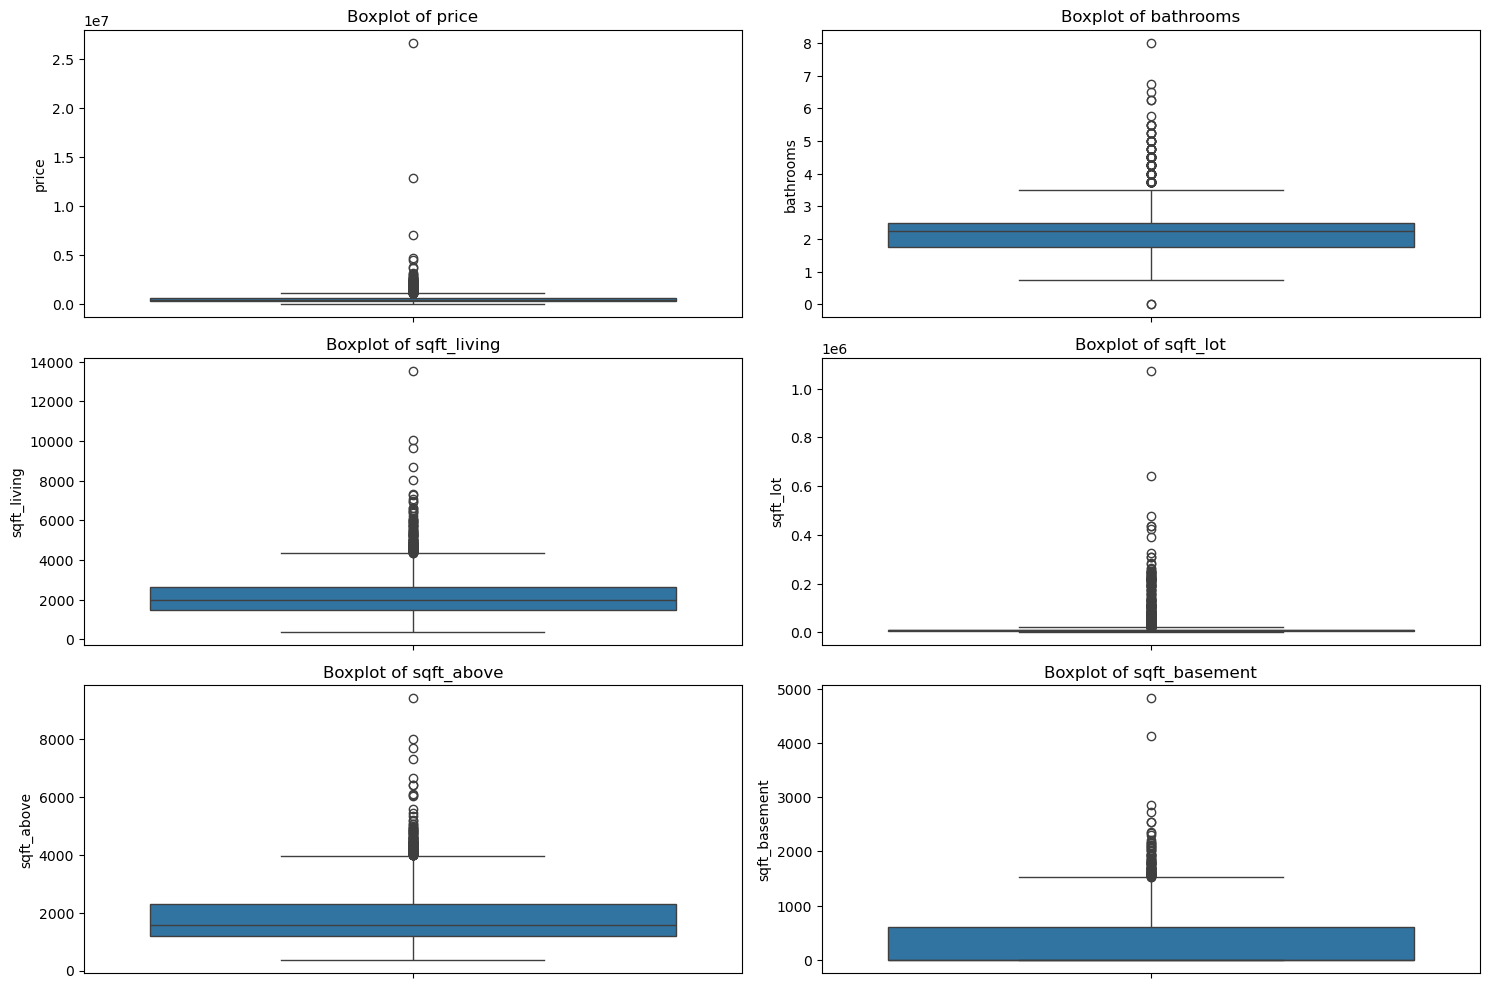

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom yang ingin ditampilkan boxplot
columns_to_plot = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Ukuran figure
plt.figure(figsize=(15, 10))

# Loop melalui kolom yang dipilih untuk membuat boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) + 1) // 2, 2, i)  # Atur grid 2 kolom
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

# Tampilkan plot
plt.tight_layout()
plt.show()


Akan mencoba menghapus outliers data, seperti di 'price', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot', dan 'sqft_basement'

In [8]:
df_cleaned = df[
    (df['price'] <= 7000000) &
    (df['price'] > 0) &
    (df['sqft_living'] <= 12000) &
    (df['sqft_above'] <= 9000) &
    (df['bathrooms'] <= 7) &
    (df['sqft_lot'] <= 800000) &
    (df['sqft_basement'] <= 4000)
]


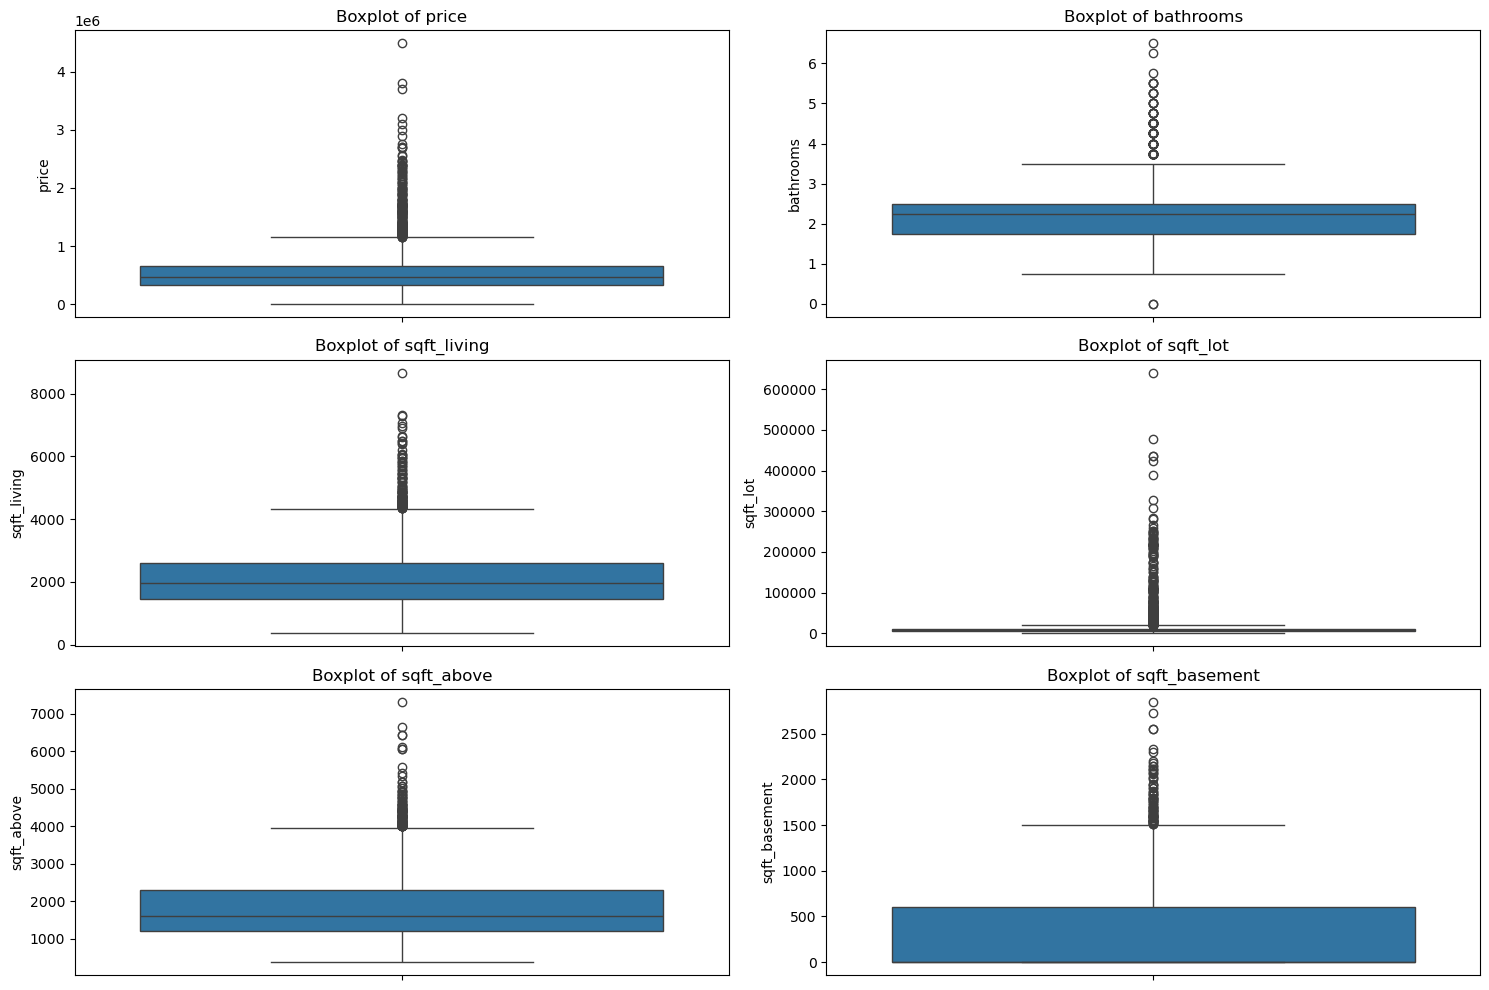

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) + 1) // 2, 2, i)  
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)
Visualisasi dan interpretasi hasil analisisnya. Perhatikan juga pemilihan visualisasinya.

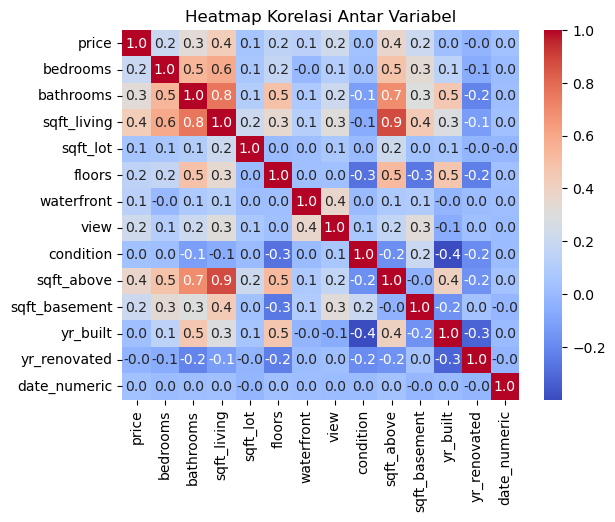

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data_porto_2.csv') 
df_heatmap = pd.DataFrame(data)
df_heatmap['date'] = pd.to_datetime(df_heatmap['date'])
df_heatmap['date_numeric'] = df_heatmap['date'].map(pd.Timestamp.timestamp)
df_heatmap = df_heatmap.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

correlation_matrix = df_heatmap.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


Korelasi antar atribut rumah.
1. Tahun dibangun berbanding terbalik dengan kondisi. Semakin besar tahun dibangun, semakin buruk kondisinya. Berarti 
2. Luas area di atas tanah berbanding lurus dengan beberapa atribut seperti price, bedrooms, bathrooms, serta sqft_above.

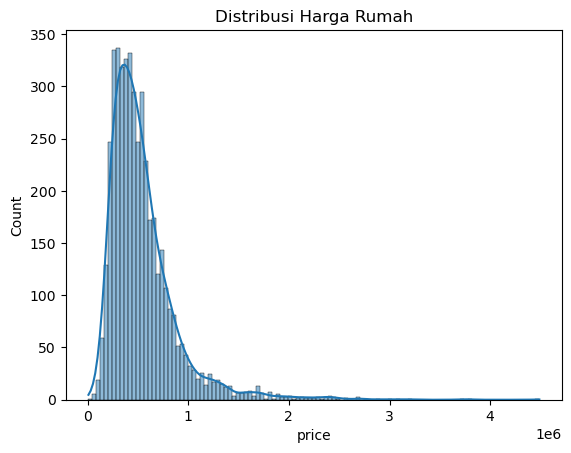

In [11]:
sns.histplot(df_cleaned['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.show()


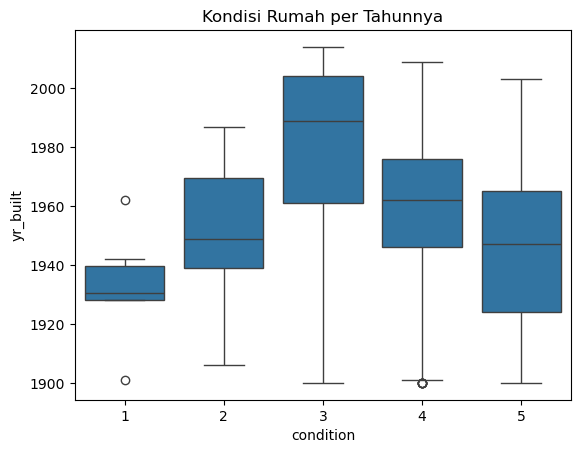

In [12]:
sns.boxplot(x='condition', y='yr_built', data=df_cleaned)
plt.title('Kondisi Rumah per Tahunnya')
plt.show()


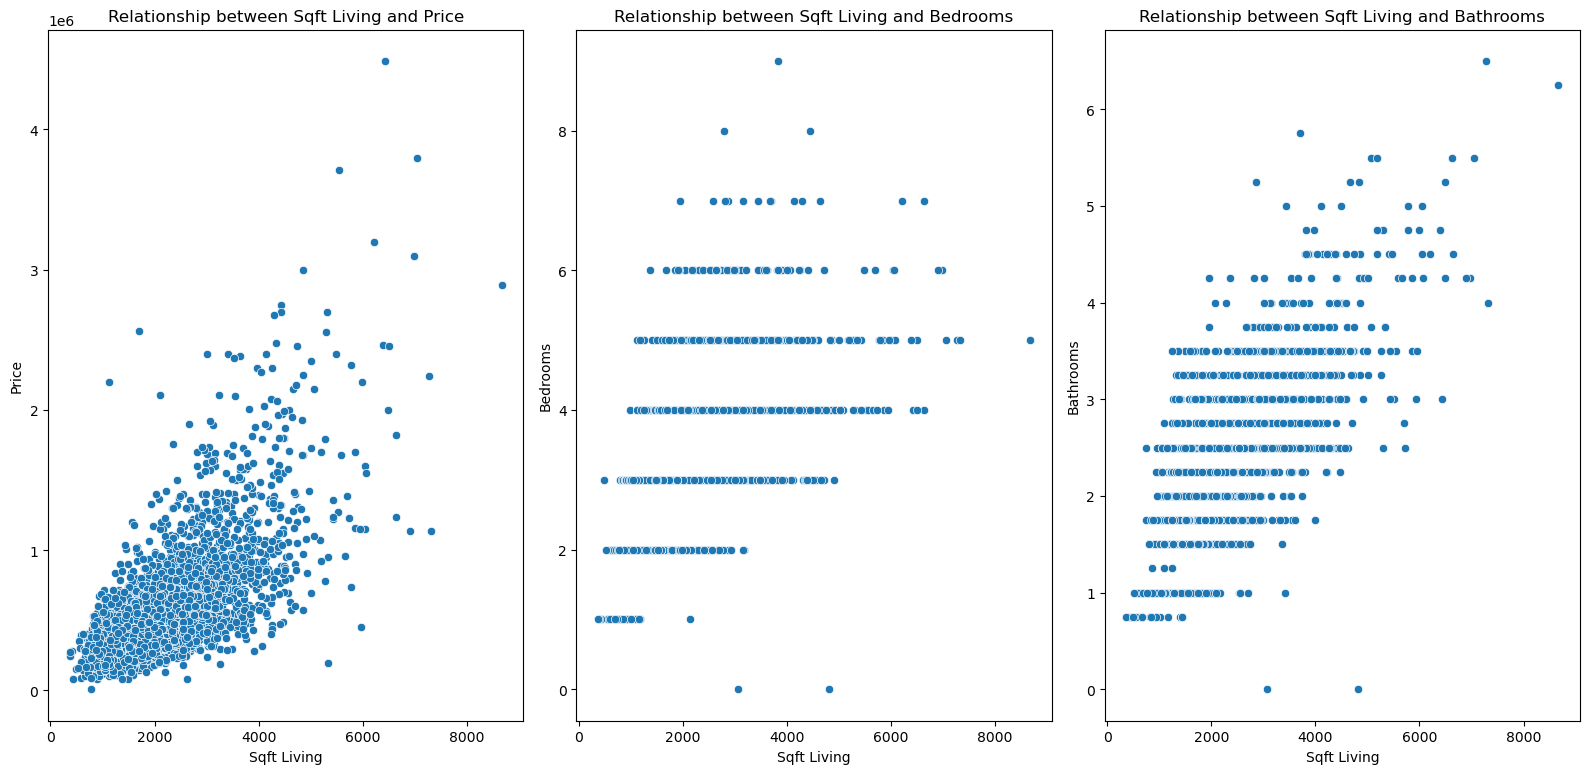

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['price'])
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['bedrooms'])
plt.title('Relationship between Sqft Living and Bedrooms')
plt.xlabel('Sqft Living')
plt.ylabel('Bedrooms')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cleaned['sqft_living'], y=df_cleaned['bathrooms'])
plt.title('Relationship between Sqft Living and Bathrooms')
plt.xlabel('Sqft Living')
plt.ylabel('Bathrooms')

plt.tight_layout()
plt.show()


## Rekomendasi

In [14]:
built_after_1990 = df_cleaned[df_cleaned['yr_built'] >= 1990]
renovated_after_2000 = df_cleaned[(df_cleaned['yr_built'] < 1990) & (df_cleaned['yr_renovated'] > 2000)]
filtered_houses = pd.concat([built_after_1990, renovated_after_2000])
recommended_houses = filtered_houses.sort_values(by='price').head(10)
print(recommended_houses)


               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                       
2014-05-20   83300.0       3.0       2.00         1490      7770     1.0   
2014-05-13   90000.0       2.0       1.00          790      2640     1.0   
2014-05-23   90000.0       2.0       1.00          580      7500     1.0   
2014-05-07  100000.0       2.0       1.00          910     22000     1.0   
2014-06-11  110000.0       2.0       1.00          800     15000     1.0   
2014-06-13  129000.0       2.0       1.00         1150     30184     1.0   
2014-06-05  132250.0       4.0       2.25         2192     12128     2.0   
2014-06-30  132250.0       4.0       2.25         1830      8734     2.0   
2014-05-23  132500.0       3.0       1.00         1080     10500     1.0   
2014-05-08  134000.0       2.0       1.50          980      5000     2.0   

            waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
date   

In [15]:
built_after_1990 = df_cleaned[df_cleaned['yr_built'] >= 1990]

renovated_after_2000 = df_cleaned[(df_cleaned['yr_built'] < 1990) & (df_cleaned['yr_renovated'] > 2000)]
filtered_houses = pd.concat([built_after_1990, renovated_after_2000])
filtered_houses = filtered_houses[filtered_houses['bedrooms'] >= 2]

median_sqft_living = filtered_houses['sqft_living'].median()
filtered_houses = filtered_houses[filtered_houses['sqft_living'] > median_sqft_living]
median_condition = filtered_houses['condition'].median()
filtered_houses = filtered_houses[filtered_houses['condition'] >= median_condition]
recommended_houses = filtered_houses.sort_values(by='price').head(10)

print(recommended_houses)


                    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                            
2014-06-05  132250.000000       4.0       2.25         2192     12128     2.0   
2014-05-20  210000.000000       4.0       1.75         2180     28710     1.0   
2014-06-25  216000.000000       3.0       2.75         2210      4000     2.0   
2014-05-21  220000.000000       4.0       2.50         2160      8005     2.0   
2014-06-24  234975.000000       4.0       2.75         2520     14021     2.0   
2014-06-26  235000.000000       5.0       2.50         2500      9583     1.0   
2014-05-08  237333.333333       3.0       2.75         3010      1842     2.0   
2014-05-09  248000.000000       4.0       3.00         2163      5883     2.0   
2014-05-20  250000.000000       4.0       1.50         2500      6300     1.0   
2014-07-08  252980.000000       4.0       2.50         2530      8169     2.0   

            waterfront  vie

In [19]:
built_after_1990 = df_cleaned[df_cleaned['yr_built'] >= 1990]
renovated_after_2000 = df_cleaned[(df_cleaned['yr_built'] < 1990) & (df_cleaned['yr_renovated'] > 2000)]
filtered_houses = pd.concat([built_after_1990, renovated_after_2000])
filtered_houses['price_per_sqft'] = filtered_houses['price'] / filtered_houses['sqft_living']
recommended_houses = filtered_houses.sort_values(by=['price', 'price_per_sqft']).head(10)

print(recommended_houses)


               price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                       
2014-05-20   83300.0       3.0       2.00         1490      7770     1.0   
2014-05-13   90000.0       2.0       1.00          790      2640     1.0   
2014-05-23   90000.0       2.0       1.00          580      7500     1.0   
2014-05-07  100000.0       2.0       1.00          910     22000     1.0   
2014-06-11  110000.0       2.0       1.00          800     15000     1.0   
2014-06-13  129000.0       2.0       1.00         1150     30184     1.0   
2014-06-05  132250.0       4.0       2.25         2192     12128     2.0   
2014-06-30  132250.0       4.0       2.25         1830      8734     2.0   
2014-05-23  132500.0       3.0       1.00         1080     10500     1.0   
2014-05-08  134000.0       2.0       1.50          980      5000     2.0   

            waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
date   